[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/repos-especializacion-UdeA/data-raw/blob/main/notebooks/merge_databases.ipynb)

# Combinación de todas las bases de datos

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [1]:
try:
    import scipy.io
except ImportError:
    !pip install scipy

## 1. Librerias y configuraciones previas

In [2]:
import sys
import os

# Get the absolute path of the current notebook
notebook_path = "."
print(notebook_path)
try:
    import google.colab
    !git clone https://github.com/repos-especializacion-UdeA/data-raw.git
    %cd /content/data-raw/notebooks   
    %pwd
    ruta_base = '/content/data-raw/notebooks/'
    sys.path.append(ruta_base)
except ImportError:
    print("El notebook no se está ejecutando en Google Colab.")
    ruta_base = './'

.
El notebook no se está ejecutando en Google Colab.


In [3]:
# command to view figures in Jupyter notebook
%matplotlib inline 

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import scipy as sc

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal


## 2. Funciones

In [4]:
# Funciones externas
# ==============================================================================
# from utils.funciones1 import multiple_plot
# from utils.funciones2 import test_hola, graficar_medida, graficar_medida2, filter_signal, \
#                             segmentar_data_base, aplanar_data_base, aplanar_ventana

In [5]:
# test_hola()

## 3. Carga del dataset

#### Metadatos

Carga de cada una de las bases de datos asociadas a los sugetos y combinación en una sola.

In [4]:
archivo_mat = scipy.io.loadmat("./raw_datasets/S1_A1_E1.mat")
emg_signals = archivo_mat['emg']
postura = archivo_mat['restimulus']
repeticion = archivo_mat['rerepetition']
sample_freq = 100

## Informacion de la base de datos

## Graficacion

In [5]:
# Configuración de las graficas
# %config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 20 # fontsize for figure titles
plt.rcParams['font.size'] = 10 # fontsize for figure numbers
# plt.rcParams['lines.linewidth'] = 1.6 # line width for plotting

In [6]:
N = len(emg_signals) # Cantidad de muestras
print(N)
sampleRate = 100 # Taza de muestreo

101014


In [7]:
timeEMG=np.linspace(0, N/sampleRate, num=N)

In [8]:
len(emg_signals[:,0])

101014

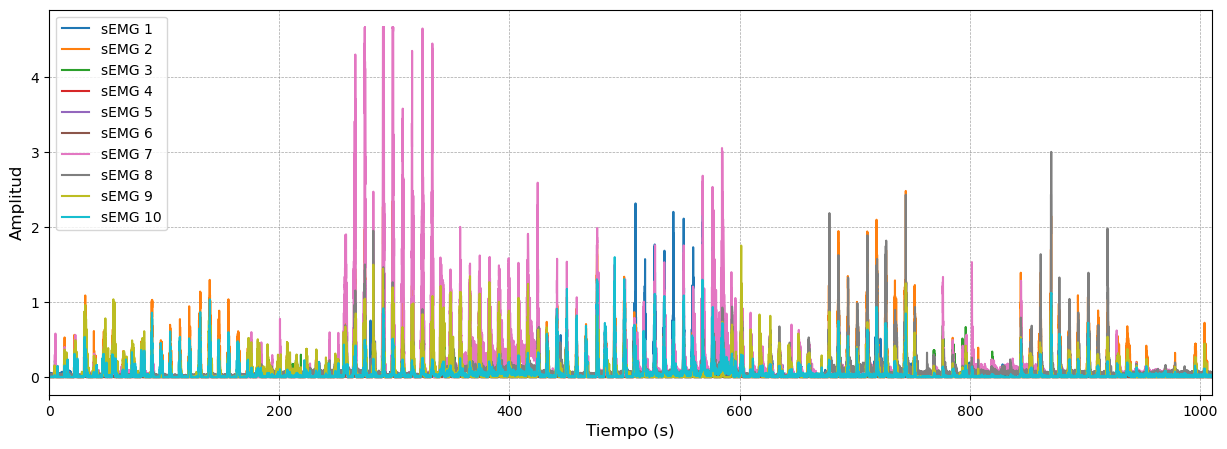

In [9]:
# Crear la figura y subgráficos
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(emg_signals.shape[1]):
    ax.plot(timeEMG, emg_signals[:,i], label='sEMG ' + str(i+1))

# Agregar etiquetas de los ejes y título del gráfico
ax.set_xlabel('Tiempo (s)', fontsize=12)
ax.set_ylabel('Amplitud', fontsize=12)
# Configurar la cuadrícula con estilo personalizado
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar la leyenda para identificar cada serie de datos
ax.legend(loc='upper right')

# Mostrar la leyenda de líneas adicionales
ax.legend()

# Agregar una cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.xlim(0,max(timeEMG))
plt.show()

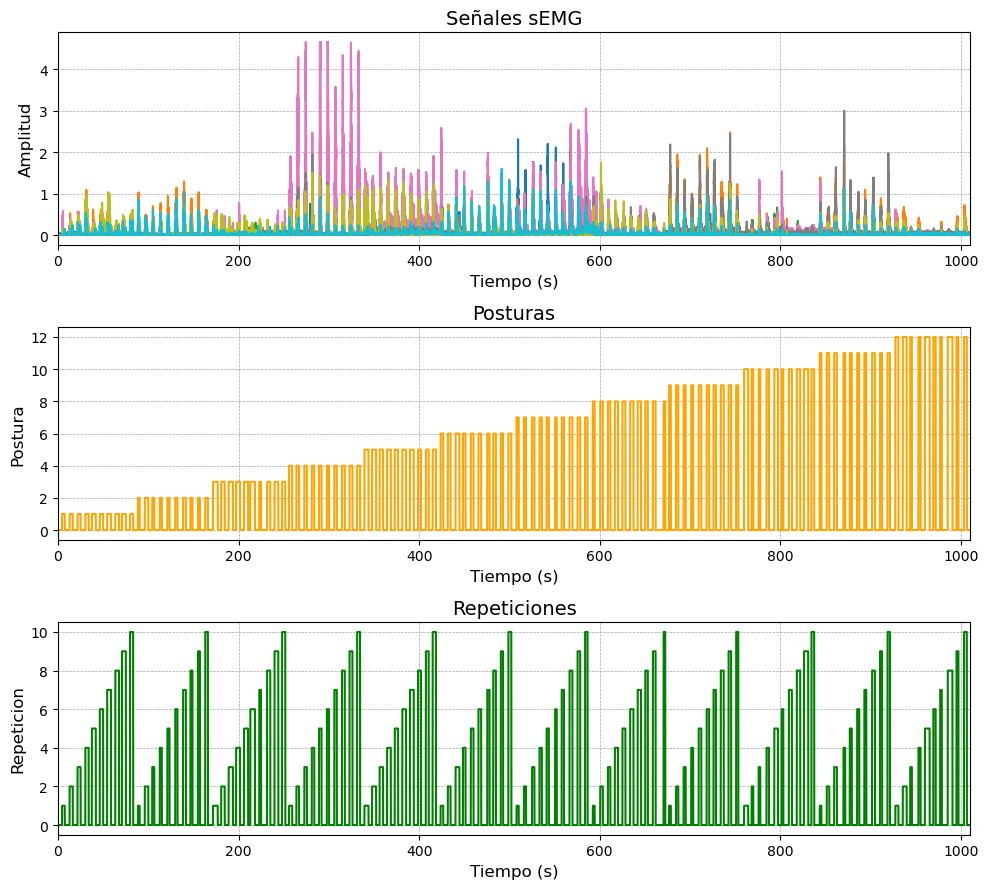

In [10]:
# Datos de ejemplo

# Crear la figura y la cuadrícula de subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# Gráfico 1: Seno
for i in range(emg_signals.shape[1]):
    axs[0].plot(timeEMG, emg_signals[:,i], label='sEMG ' + str(i+1))
axs[0].set_title('Señales sEMG', fontsize=14)
axs[0].set_xlabel('Tiempo (s)', fontsize=12)
axs[0].set_ylabel('Amplitud', fontsize=12)
axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axs[0].set_xlim(0,max(timeEMG))

# Gráfico 2: Postura
axs[1].plot(timeEMG, postura, color='orange')
axs[1].set_title('Posturas', fontsize=14)
axs[1].set_xlabel('Tiempo (s)', fontsize=12)
axs[1].set_ylabel('Postura', fontsize=12)
axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axs[1].set_xlim(0,max(timeEMG))

# Gráfico 3: Repeticion
axs[2].plot(timeEMG, repeticion, color='green')
axs[2].set_title('Repeticiones', fontsize=14)
axs[2].set_xlabel('Tiempo (s)', fontsize=12)
axs[2].set_ylabel('Repeticion', fontsize=12)
axs[2].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axs[2].set_xlim(0,max(timeEMG))

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico con subplots
plt.show()

## Preprocesamiento de la señal

### Filtrado de ruido

A continuación se realiza un filtrado de ruido de la señal

In [12]:
cutoff_freq = 1
nyquist = sample_freq/2
filter_order = 2
filter_type = 'lowpass'
normal_cutoff = cutoff_freq / nyquist
b, a = signal.butter(N = filter_order, 
                     Wn = normal_cutoff, 
                     btype = filter_type)

emgs_filter = signal.filtfilt(b, a, emg_signals, axis=0)

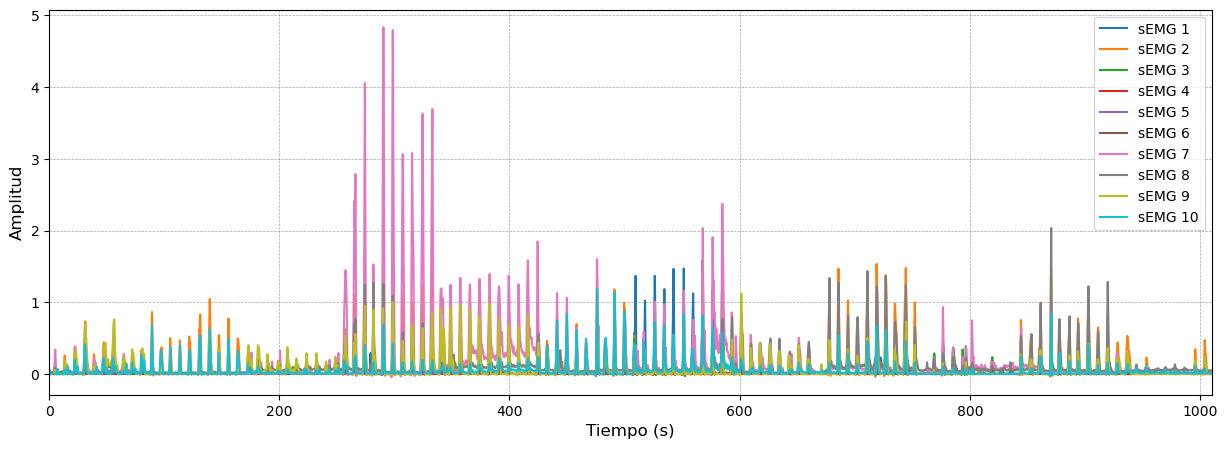

In [13]:
# Crear la figura y subgráficos
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(emgs_filter.shape[1]):
    ax.plot(timeEMG, emgs_filter[:,i], label='sEMG ' + str(i+1))

# Agregar etiquetas de los ejes y título del gráfico
ax.set_xlabel('Tiempo (s)', fontsize=12)
ax.set_ylabel('Amplitud', fontsize=12)
# Configurar la cuadrícula con estilo personalizado
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar la leyenda para identificar cada serie de datos
ax.legend(loc='upper right')

# Mostrar la leyenda de líneas adicionales
ax.legend()

# Agregar una cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.xlim(0,max(timeEMG))
plt.show()

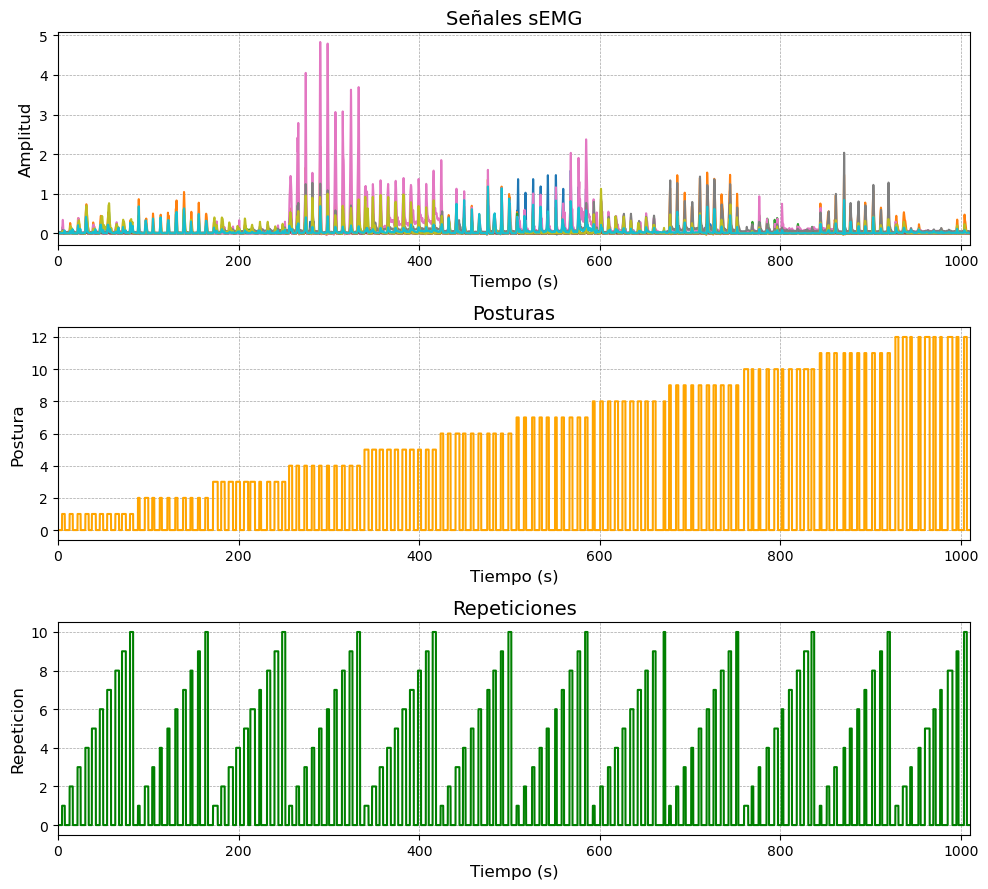

In [14]:
# Crear la figura y la cuadrícula de subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# Gráfico 1: Seno
for i in range(emgs_filter.shape[1]):
    axs[0].plot(timeEMG, emgs_filter[:,i], label='sEMG ' + str(i+1))
axs[0].set_title('Señales sEMG', fontsize=14)
axs[0].set_xlabel('Tiempo (s)', fontsize=12)
axs[0].set_ylabel('Amplitud', fontsize=12)
axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axs[0].set_xlim(0,max(timeEMG))

# Gráfico 2: Postura
axs[1].plot(timeEMG, postura, color='orange')
axs[1].set_title('Posturas', fontsize=14)
axs[1].set_xlabel('Tiempo (s)', fontsize=12)
axs[1].set_ylabel('Postura', fontsize=12)
axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axs[1].set_xlim(0,max(timeEMG))

# Gráfico 3: Repeticion
axs[2].plot(timeEMG, repeticion, color='green')
axs[2].set_title('Repeticiones', fontsize=14)
axs[2].set_xlabel('Tiempo (s)', fontsize=12)
axs[2].set_ylabel('Repeticion', fontsize=12)
axs[2].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axs[2].set_xlim(0,max(timeEMG))

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico con subplots
plt.show()

In [15]:
emgs_filter[:3]

array([[0.06752279, 0.00240159, 0.00239855, 0.00240314, 0.00239509,
        0.00980018, 0.00239999, 0.05035747, 0.0024    , 0.03419234],
       [0.06628393, 0.00240207, 0.00240184, 0.00240373, 0.00239511,
        0.00947423, 0.00239999, 0.04970653, 0.0024    , 0.03281989],
       [0.06504509, 0.00240258, 0.00240519, 0.00240436, 0.00239515,
        0.00914938, 0.00239999, 0.04905012, 0.0024    , 0.03145152]])

En el siguiente enlace se muestra como realizar el calculo de la relación señal a ruido https://github.com/akueisara/audio-signal-processing/blob/master/week%204/A4/A4Part2.py

In [50]:
# perform 2-order 1Hz low-pass filter
emgs_df_filt =  filter_signal(data_base.iloc[:,1:11])  
data_base_filter =  pd.concat([data_base['s'], emgs_df_filt, data_base['rep'] , data_base['label']], axis=1)
data_base_filter.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,1,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,1,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,1,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0


## Grafica de la señal mECG

A continuación se muestra la grafica de la señal de electromiografia superficial para el sugeto 1 ejecutando ejecutando las 12 posturas. 

En la siguiente grafica se hace enfasis en las repeticiones del ejercicio 1

In [73]:
# Numero del estimulo
def indice_postura(estimulo_data, num):
  if isinstance(estimulo_data, pd.DataFrame):
    # Nota: Cuadrar aca...
    return (estimulo_data.index[estimulo_data == num][0],estimulo_data.index[estimulo_data == num][-1])
  else:
    index_cambios = np.where(estimulo_data == num)[0]
    if num == 1:      
      return (0,index_cambios[-1])
    else:
      index_cambios_anterior = np.where(estimulo_data == num - 1)[0]
      return (index_cambios_anterior[-1] + 1,index_cambios[-1])

  
ind1 = indice_postura(postura,1)
print(ind1)

ind2 = indice_postura(postura,2)
print(ind2)

(0, 8315)
(8316, 16599)


In [74]:
type(postura)

numpy.ndarray

In [75]:
ind = indice_postura(postura,1)
ind

(0, 8315)

(8316,)
(101014, 10)
(8316, 10)


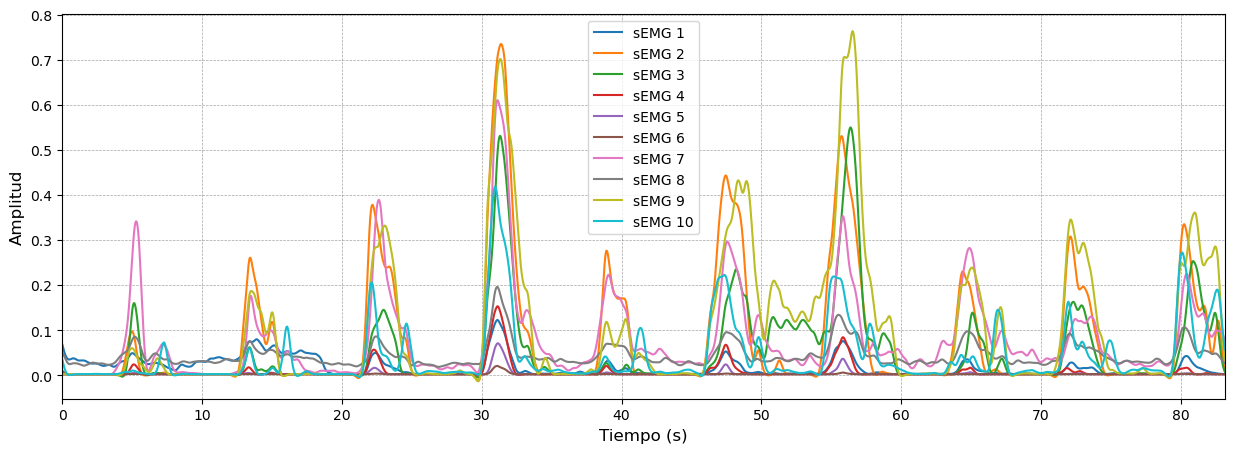

In [89]:
# Crear la figura y subgráficos

start_index = ind[0]
end_index = ind[1]
init_time = start_index*1/sample_freq
fig, ax = plt.subplots(figsize=(15, 5))
timeEMG_post1 = timeEMG[start_index:end_index + 1]
print(timeEMG_post1.shape)
print(emgs_filter.shape)
emgs_filter_post1 = emgs_filter[start_index:end_index + 1,:]
print(emgs_filter_post1.shape)

for i in range(emgs_filter_post1.shape[1]):
    ax.plot(timeEMG_post1, emgs_filter_post1[:,i], label='sEMG ' + str(i+1))

# Agregar etiquetas de los ejes y título del gráfico
ax.set_xlabel('Tiempo (s)', fontsize=12)
ax.set_ylabel('Amplitud', fontsize=12)
# Configurar la cuadrícula con estilo personalizado
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar la leyenda para identificar cada serie de datos
ax.legend(loc='best')

# Mostrar la leyenda de líneas adicionales
ax.legend()

# Agregar una cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.xlim(min(timeEMG_post1),max(timeEMG_post1))
plt.show()


(8316, 16599)
(8284,)
(8284, 10)


(83.16082326037242, 165.99164325383862)

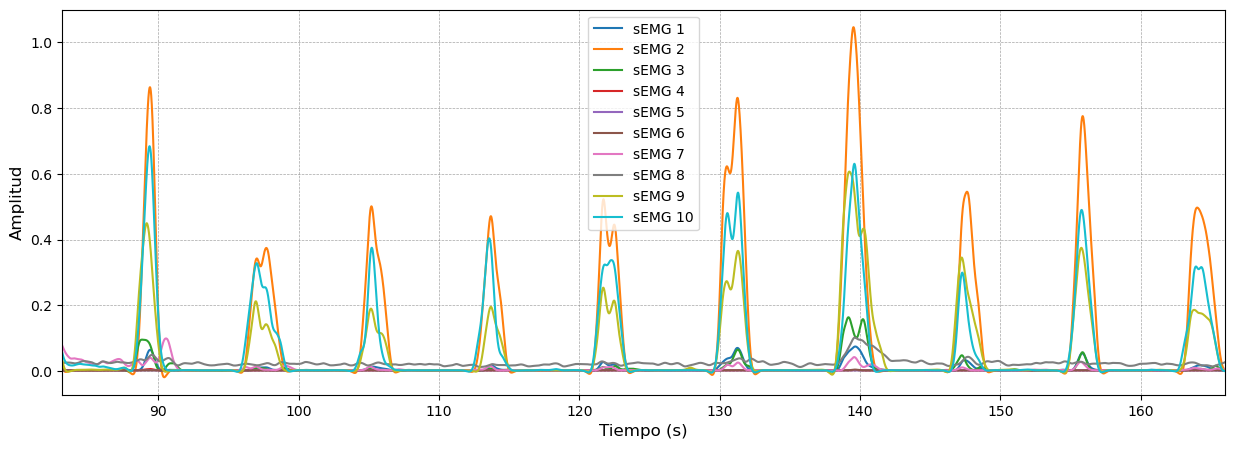

In [91]:
# Crear la figura y subgráficos
ind_post2 = indice_postura(postura,2)
print(ind_post2)
start_index = ind_post2[0]
end_index = ind_post2[1]
fig, ax = plt.subplots(figsize=(15, 5))
timeEMG_post2 = timeEMG[start_index:end_index + 1] 
print(timeEMG_post2.shape)
emgs_filter_post2 = emgs_filter[start_index:end_index + 1,:]
print(emgs_filter_post2.shape)
for i in range(emgs_filter_post2.shape[1]):
    ax.plot(timeEMG_post2, emgs_filter_post2[:,i], label='sEMG ' + str(i+1))

# Agregar etiquetas de los ejes y título del gráfico
ax.set_xlabel('Tiempo (s)', fontsize=12)
ax.set_ylabel('Amplitud', fontsize=12)
# Configurar la cuadrícula con estilo personalizado
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar la leyenda para identificar cada serie de datos
ax.legend(loc='best')

# Mostrar la leyenda de líneas adicionales
ax.legend()

# Agregar una cuadrícula
ax.grid(True)

# Mostrar el gráfico
plt.xlim(min(timeEMG_post2),max(timeEMG_post2))

#### Grafica combinada por label

La grafica combinada tiene un error y es que esta desfasada o retrasada.

(0, 8315)


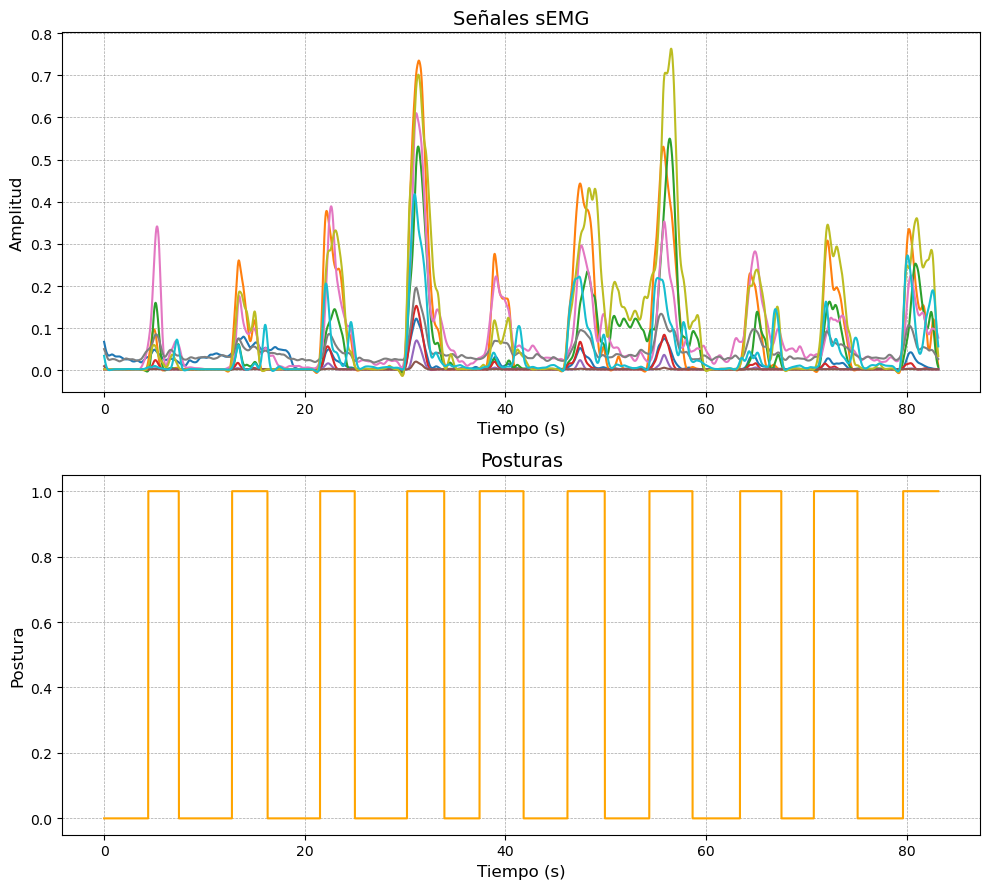

In [103]:
# Crear la figura y subgráficos
ind_post1 = indice_postura(postura,1)
print(ind_post1)
start_index = ind_post1[0]
end_index = ind_post1[1]

timeEMG_post1 = timeEMG[start_index:end_index + 1] 
emgs_filter_post1 = emgs_filter[start_index:end_index + 1,:]

# Crear la figura y la cuadrícula de subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 1, figsize=(10, 9))

# Gráfico 1: Seno
for i in range(emgs_filter_post1.shape[1]):
    axs[0].plot(timeEMG_post1, emgs_filter_post1[:,i], label='sEMG ' + str(i+1))
axs[0].set_title('Señales sEMG', fontsize=14)
axs[0].set_xlabel('Tiempo (s)', fontsize=12)
axs[0].set_ylabel('Amplitud', fontsize=12)
axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.xlim(min(timeEMG_post1),max(timeEMG_post1))

# Gráfico 2: Postura
postura1 = postura[start_index:end_index + 1] 
axs[1].plot(timeEMG_post1, postura1, color='orange')
axs[1].set_title('Posturas', fontsize=14)
axs[1].set_xlabel('Tiempo (s)', fontsize=12)
axs[1].set_ylabel('Postura', fontsize=12)
axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.xlim(min(timeEMG_post1),max(timeEMG_post1))

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico con subplots
plt.show()

(0, 8315)


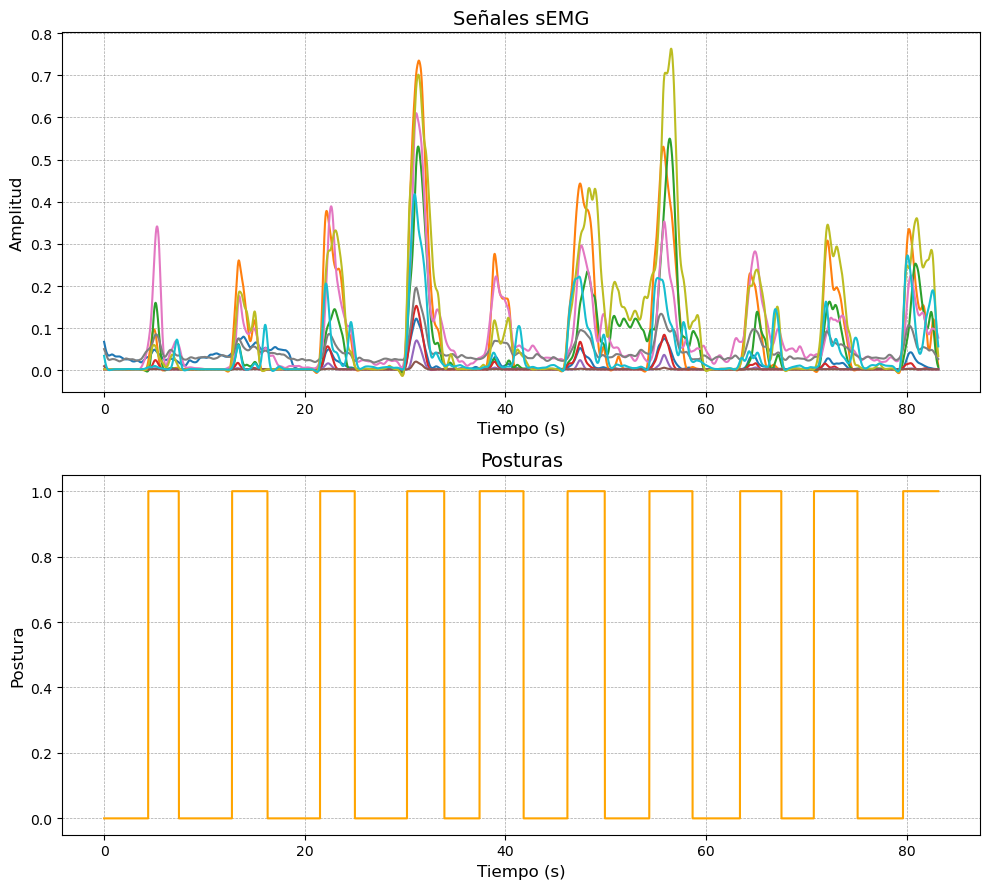

In [ ]:
# Crear la figura y subgráficos
ind_post1 = indice_postura(postura,1)
print(ind_post1)
start_index = ind_post1[0]
end_index = ind_post1[1]

timeEMG_post1 = timeEMG[start_index:end_index + 1] 
emgs_filter_post1 = emgs_filter[start_index:end_index + 1,:]

# Crear la figura y la cuadrícula de subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 1, figsize=(10, 9))

# Gráfico 1: Seno
for i in range(emgs_filter_post1.shape[1]):
    axs[0].plot(timeEMG_post1, emgs_filter_post1[:,i], label='sEMG ' + str(i+1))
axs[0].set_title('Señales sEMG', fontsize=14)
axs[0].set_xlabel('Tiempo (s)', fontsize=12)
axs[0].set_ylabel('Amplitud', fontsize=12)
axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.xlim(min(timeEMG_post1),max(timeEMG_post1))

# Gráfico 2: Postura
postura1 = postura[start_index:end_index + 1] 
axs[1].plot(timeEMG_post1, postura1, color='orange')
axs[1].set_title('Posturas', fontsize=14)
axs[1].set_xlabel('Tiempo (s)', fontsize=12)
axs[1].set_ylabel('Postura', fontsize=12)
axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.xlim(min(timeEMG_post1),max(timeEMG_post1))

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico con subplots
plt.show()

(8316, 16599)


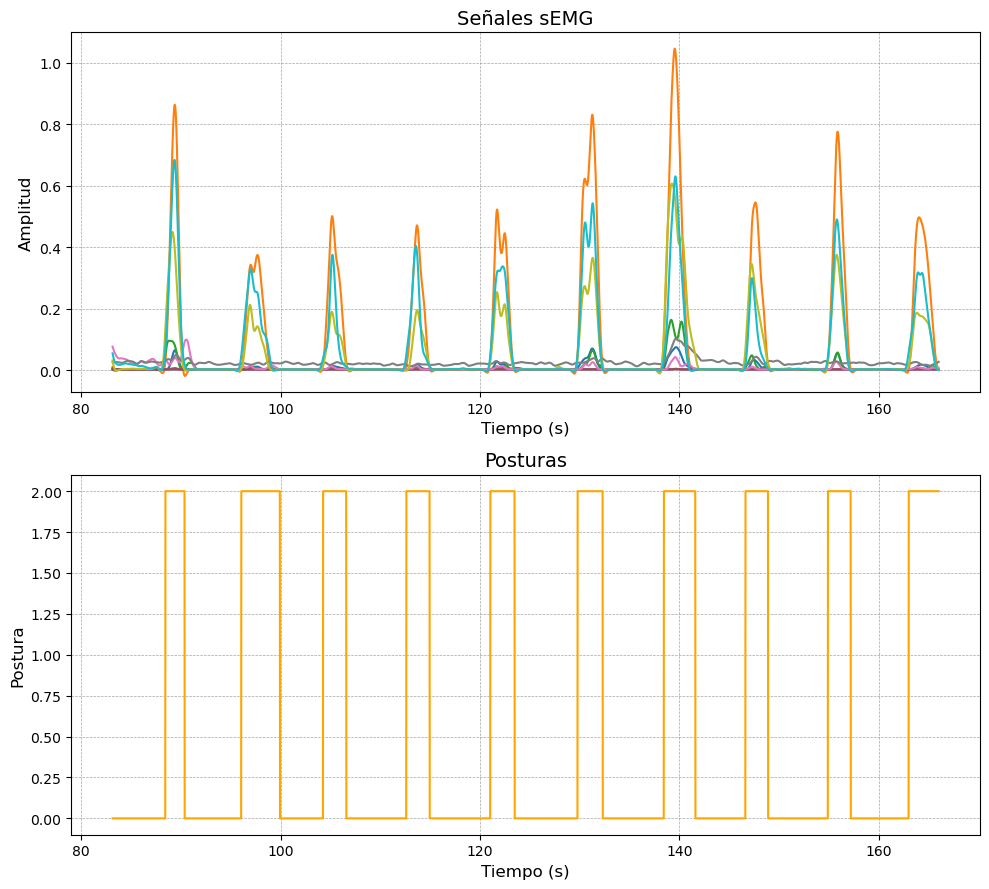

In [104]:
# Crear la figura y subgráficos
ind_post2 = indice_postura(postura,2)
print(ind_post2)
start_index = ind_post2[0]
end_index = ind_post2[1]

timeEMG_post2 = timeEMG[start_index:end_index + 1] 

# Crear la figura y la cuadrícula de subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 1, figsize=(10, 9))

# Gráfico 1: Seno
for i in range(emgs_filter_post2.shape[1]):
    axs[0].plot(timeEMG_post2, emgs_filter_post2[:,i], label='sEMG ' + str(i+1))
axs[0].set_title('Señales sEMG', fontsize=14)
axs[0].set_xlabel('Tiempo (s)', fontsize=12)
axs[0].set_ylabel('Amplitud', fontsize=12)
axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.xlim(min(timeEMG_post2),max(timeEMG_post2))


# Gráfico 2: Postura
postura2 = postura[start_index:end_index + 1] 
axs[1].plot(timeEMG_post2, postura2, color='orange')
axs[1].set_title('Posturas', fontsize=14)
axs[1].set_xlabel('Tiempo (s)', fontsize=12)
axs[1].set_ylabel('Postura', fontsize=12)
axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#plt.xlim(min(timeEMG_post2),max(timeEMG_post2))

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico con subplots
plt.show()

In [66]:
print(data_base_filter.shape)
print(data_base_filter.isna().sum())

(2731393, 13)
s         0
emg_1     0
emg_2     0
emg_3     0
emg_4     0
emg_5     0
emg_6     0
emg_7     0
emg_8     0
emg_9     0
emg_10    0
rep       0
label     0
dtype: int64


In [99]:
# Exportamos el dataframe a un archivo CSV
# data_base_filter.to_csv('./datasets/dataset.csv', index=False)

Hasta aqui queda la base de datos estructurada. La siguiente parte consiste en meterla al modelo y rezar para que de.

Aqui no se van a eliminar outlines para evitar la perdida de continuidad de la señal.

## Referencias

* https://github.com/parasgulati8/NinaPro-Helper-Library
* https://github.com/Lif3line/nina_helper_package_mk2
* https://github.com/cnzero/NinaproCNN/tree/master
* https://github.com/sebastiankmiec/NinaTools
* https://github.com/sun2009ban/divide_NinaPro_database_5
* https://github.com/tsagkas/sEMG-HandGestureRecognition 
* https://repositorio.unbosque.edu.co/items/61d39597-5a61-491c-909a-849e53efe8ad
* https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/
* https://pmc.ncbi.nlm.nih.gov/articles/PMC1455479/#sec2
* https://github.com/emckiernan/electrophys
* https://github.com/emckiernan/electrophys/blob/master/EMG/EMGbasics/code/EMGvisualization.ipynb
* https://gist.github.com/emckiernan/005e971b29a4a0532ee804869470f426
* https://electrophys.wordpress.com/
* https://electrophys.wordpress.com/home/dataanalysis/extraccion-y-visualizacion-datos/
* https://electrophys.wordpress.com/home/electromyography/graphing-and-exploring-emg-data/
* https://electrophys.wordpress.com/home/electromyography/filtering-and-analyzing-emg-data/
* https://scikit-learn.org/1.5/modules/preprocessing.html
* https://qu4nt.github.io/sklearn-doc-es/modules/preprocessing.html
* https://www.datacamp.com/tutorial/a-data-scientists-guide-to-signal-processing
* https://github.com/AGhaderi/MNE-Preprocessing?tab=readme-ov-file
* https://g0rella.github.io/gorella_mwn/preprocessing_eeg.html
* https://g0rella.github.io/gorella_mwn/python_visualization_for_data.html
* https://www.kaggle.com/code/faressayah/signal-processing-with-python
* https://www.analog.com/en/resources/technical-books/scientist_engineers_guide.html